# Imports

In [1]:
from src.IOSystem import IOSystem
from src.SupplyChain import SupplyChain

import tkinter as tk
from tkinter import ttk

# Tests

In [2]:
def get_multiindex_selection(index):
    """
    Funktion zur Darstellung eines MultiIndex in einer interaktiven Baumstruktur.
    Gibt das ausgewählte Schema als Dictionary zurück.
    
    :param index: pd.MultiIndex - Der MultiIndex, der im TreeView angezeigt wird
    :return: dict - Das ausgewählte Schema im Dictionary-Format
    """
    
    # Tkinter Fenster erstellen
    root = tk.Tk()
    root.title("MultiIndex GUI")

    # Fenstergröße anpassen (breiter machen)
    root.geometry("600x400")  # Breiter machen, z.B. 600px Breite, 400px Höhe

    # Treeview erstellen (größer machen) - Nur eine Textspalte
    tree = ttk.Treeview(root, height=15, columns=("text"))  # Eine Spalte 'text'
    tree.heading("#1", text="Bezeichnung")  # Überschrift für die Spalte
    tree.column("#1", width=300)  # Breite der Textspalte einstellen
    tree.pack(fill="both", expand=True)

    # Label zum Anzeigen des Pfades als Dictionary
    path_label = tk.Label(root, text="Auswahl als Dictionary: ", font=("Arial", 12))
    path_label.pack(pady=10)

    # Variable zum Speichern des Pfades
    selected_path = {}

    # Funktion, um die Baumstruktur aus dem MultiIndex zu erstellen
    def create_treeview_from_index(parent, index, level=0, path=""):
        if level < len(index.names):
            unique_values = index.get_level_values(level).unique()
            for value in unique_values:
                node_name = value
                node_id = f"{path}-{value}"
                new_parent = tree.insert(parent, 'end', node_id, text=node_name)
                subset = index[index.get_level_values(level) == value]
                create_treeview_from_index(new_parent, subset, level + 1, node_id)

    # Baumstruktur aus dem MultiIndex erstellen
    create_treeview_from_index('', index)

    # Funktion zum Anzeigen des gesamten Pfades der ausgewählten Knoten als Dictionary
    def show_selection(event):
        selected_item = tree.selection()[0]
        path = [tree.item(selected_item)['text']]
        
        # Sammle den Pfad von den Elternknoten
        while tree.parent(selected_item):
            parent_item = tree.parent(selected_item)
            path.insert(0, tree.item(parent_item)['text'])
            selected_item = parent_item
        
        # Erstelle das Dictionary mit dem letzten Wert der Auswahl
        nonlocal selected_path
        selected_path = {}

        # Füge nur das letzte Element (die ausgewählte Ebene) in das Dictionary ein
        selected_path[index.names[len(path) - 1]] = path[-1]

        # Zeige das Dictionary mit der letzten Auswahl an
        path_label.config(text="Auswahl als Dictionary: " + str(selected_path))


    # Ereignisbindung zum Auswählen von Knoten
    tree.bind("<<TreeviewSelect>>", show_selection)

    # Funktion zum Speichern der Auswahl und Schließen des Fensters
    def on_close():
        root.destroy()  # Verwende destroy(), um das Fenster zu schließen

    # Ereignis für das Schließen des Fensters
    root.protocol("WM_DELETE_WINDOW", on_close)

    root.mainloop()
    
    return selected_path

In [9]:
database = IOSystem(year=2022, language="german")
database.load()

2025-03-29 19:35:43,462 - INFO - Fast database was found - Loading...
2025-03-29 19:35:44,196 - INFO - Database has been loaded successfully in 0.73 seconds.



Updating the MultiIndices of all matrices to german



In [4]:
#supplychain = SupplyChain(database=database, **{**get_multiindex_selection(database.Index.region_multiindex), **get_multiindex_selection(database.Index.sector_multiindex_per_region)})
supplychain = SupplyChain(database=database, Region="Deutschland", Sektor="Textilien")
print(supplychain)

SupplyChain(Number of Indices: 1, Hierarchy levels: {'Kontinent': None, 'Region': 'Deutschland', 'Wirtschaftssektor': None, 'Abschnitt': None, 'Unterabschnitt': None, 'Abteilung': None, 'Sektor': 'Textilien'})


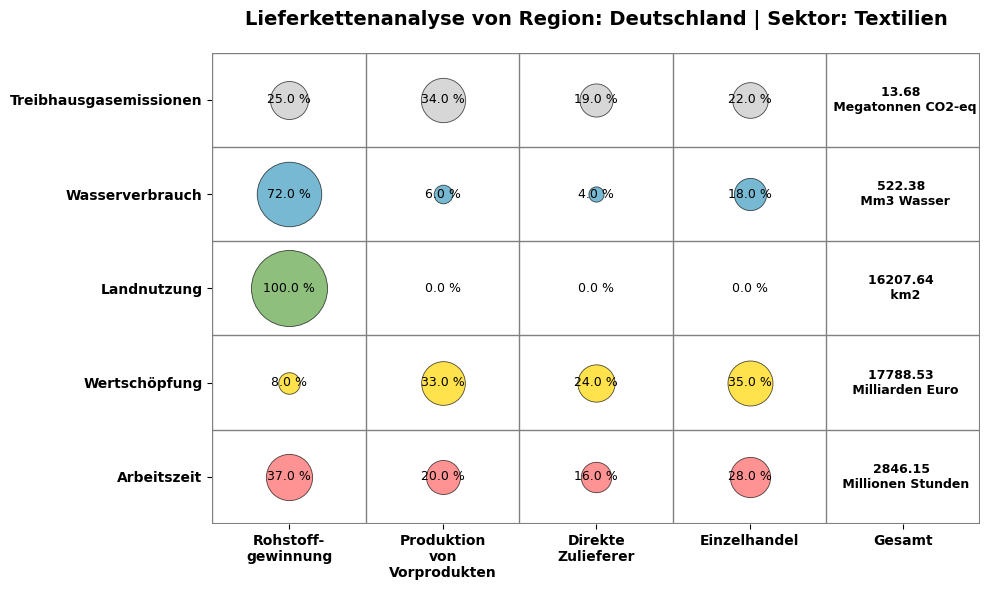

In [5]:
supplychain.plot_supply_chain(impacts=["Treibhausgasemissionen", "Wasserverbrauch", "Landnutzung", "Wertschöpfung", "Arbeitszeit"])

In [6]:
supplychain.calculate_all(impacts=["Treibhausgasemissionen", "Wasserverbrauch", "Landnutzung", "Wertschöpfung", "Arbeitszeit"], relative=False, decimal_places=5)

,Rohstoff-\ngewinnung,Produktion\nvon\nVorprodukten,Direkte\nZulieferer,Einzelhandel,Gesamt,Einheit,Farbe
Treibhausgasemissionen,3.44,4.64,2.60,3.01,13.68,Megatonnen CO2-eq,#c7c7c6
Wasserverbrauch,376.14,30.92,20.63,94.68,522.38,Mm3 Wasser,#3e9cbf
Landnutzung,16207.64,0.00,0.00,0.00,16207.64,km2,#5ea545
Wertschöpfung,1494.06,5827.96,4237.67,6228.83,17788.53,Milliarden Euro,#FFD700
Arbeitszeit,1041.89,570.10,445.98,788.17,2846.15,Millionen Stunden,#ff6666


c:\Users\Jonas\Documents\Hector\Kooperationsphase IO-Modelle\exiobase_explorer\src\SupplyChain.py:368: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([f"{int(tick)}%" for tick in cbar.get_ticks()])


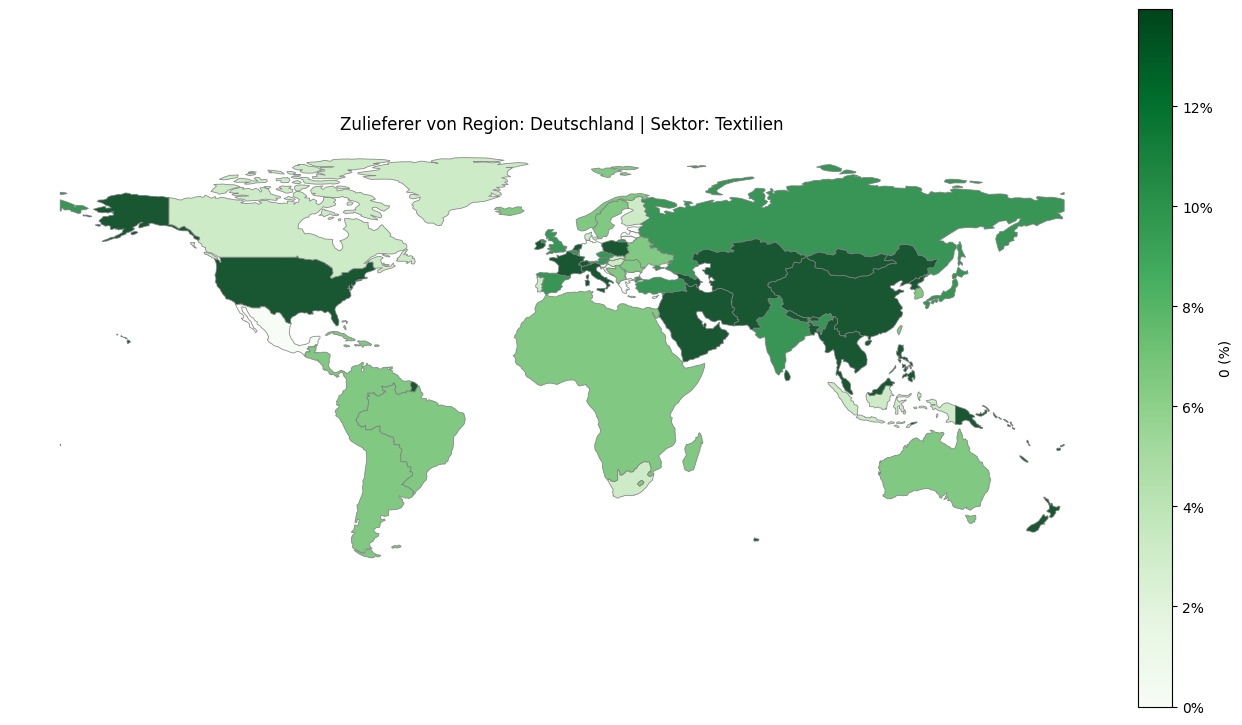

In [7]:
supplychain.plot_subcontractors(color="Greens")